In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
 
%matplotlib inline
plt.style.use('fivethirtyeight')
df=pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv',parse_dates=['Date'])


In [9]:
df.head()


,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


In [14]:
df['Total Cases']=df[['Confirmed','Recovered','Deaths']].sum(axis=1)


In [15]:
worldwide_df=df.groupby(['Date']).sum()
worldwide_df.head()

/tmp/ipykernel_6804/432882700.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  worldwide_df=df.groupby(['Date']).sum()


,Confirmed,Recovered,Deaths,Total Cases
Date,,,,
2020-01-22,557,30,17,604
2020-01-23,657,32,18,707
2020-01-24,944,39,26,1009
2020-01-25,1437,42,42,1521
2020-01-26,2120,56,56,2232


/tmp/ipykernel_6804/2719699903.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  worldwide_df=df.groupby(['Date']).sum()


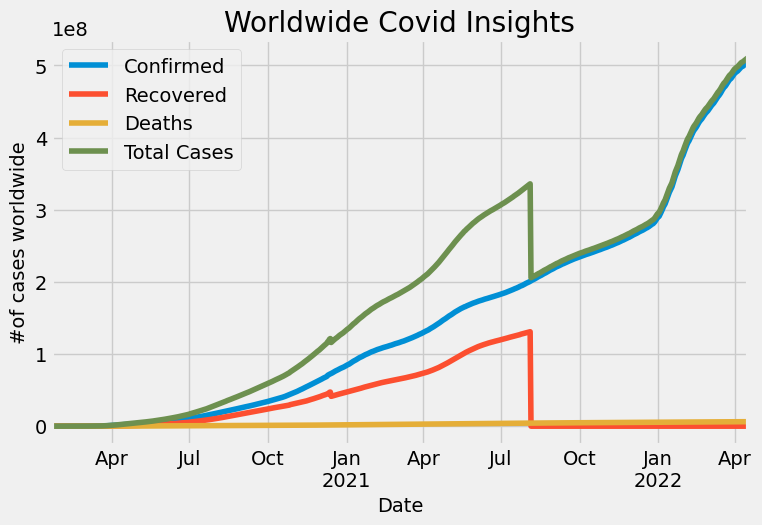

In [20]:
worldwide_df=df.groupby(['Date']).sum()
w=worldwide_df.plot(figsize=(8,5))
w.set_xlabel('Date')
w.set_ylabel('#of cases worldwide')
w.title.set_text('Worldwide Covid Insights')

/tmp/ipykernel_6804/3190866570.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  us_df=df[df['Country']=='US'].groupby(['Date']).sum()


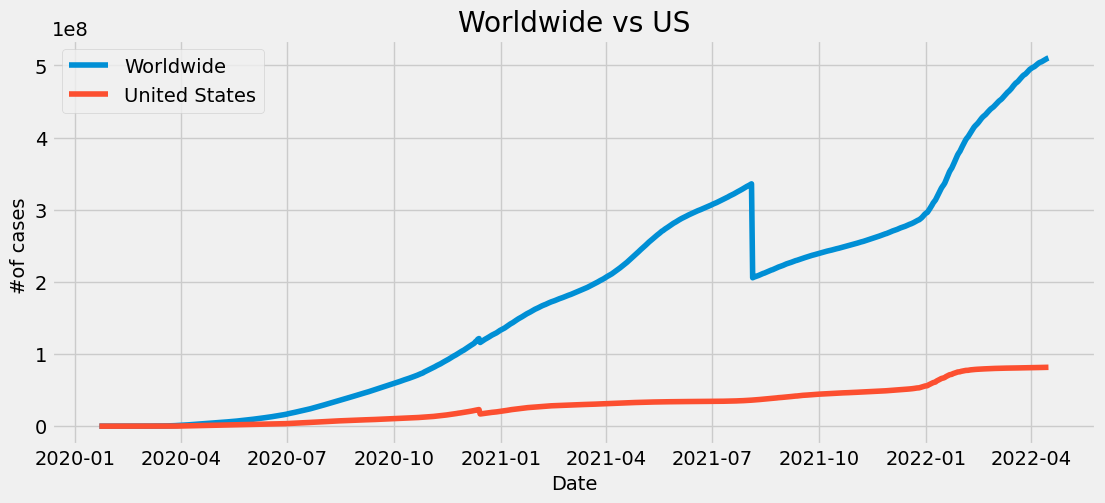

In [23]:
us_df=df[df['Country']=='US'].groupby(['Date']).sum()
fig=plt.figure(figsize=(12,5))
ax=fig.add_subplot(111)
ax.plot(worldwide_df[['Total Cases']],label='Worldwide')
ax.plot(us_df[['Total Cases']],label='United States')
ax.set_xlabel('Date')
ax.set_ylabel('#of cases ')
ax.title.set_text('Worldwide vs US')

plt.legend(loc='upper left')
plt.show()


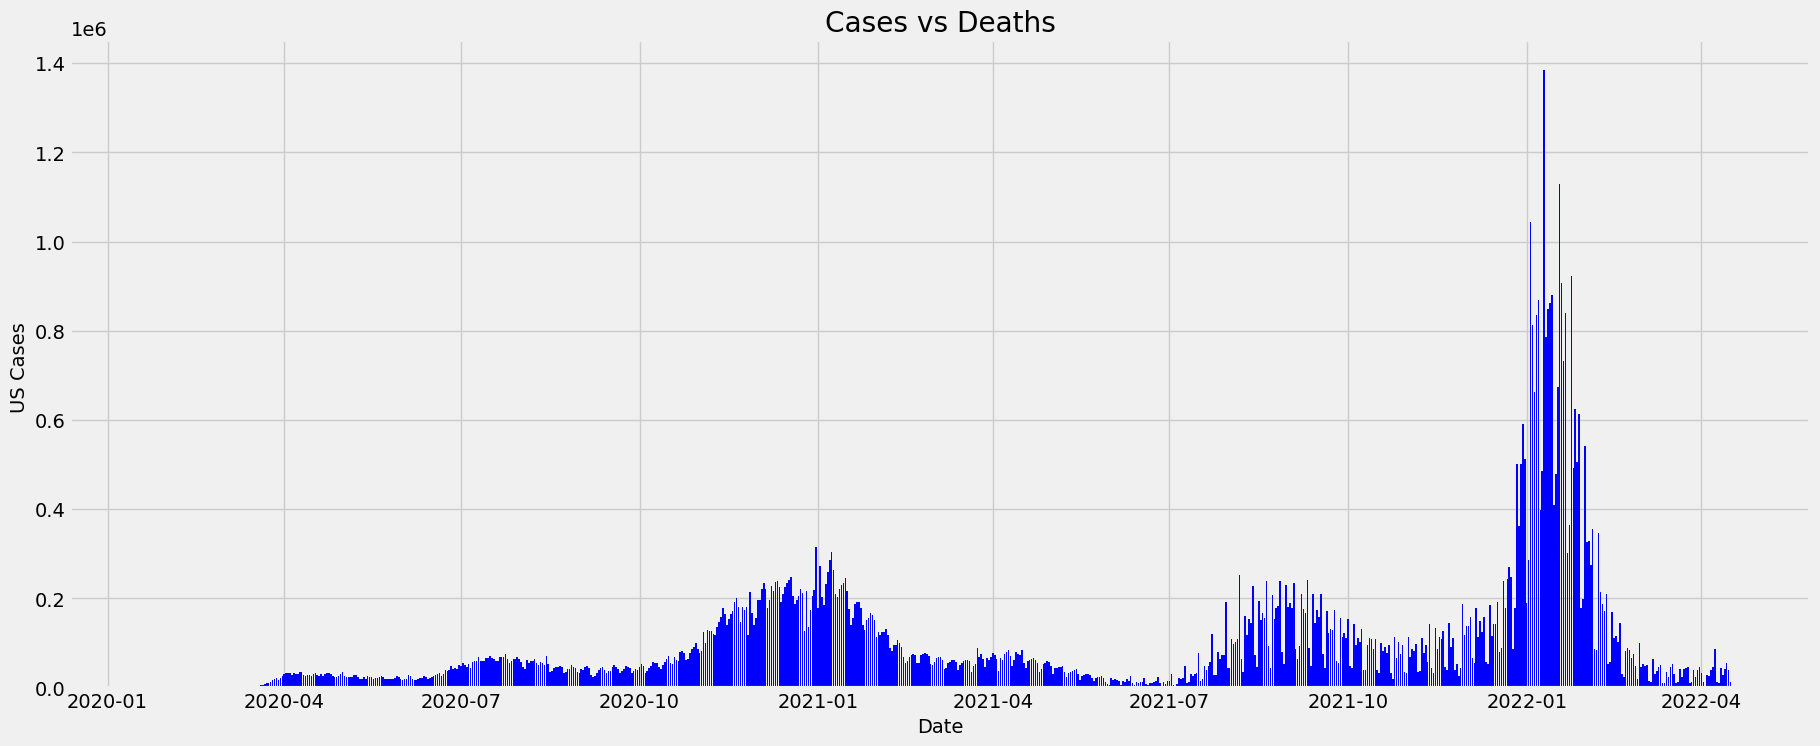

In [34]:
us_df['Daily Confirmed']=us_df['Confirmed'].sub(us_df['Confirmed'].shift())
us_df['Daily Deaths']=us_df['Deaths'].sub(us_df['Deaths'].shift())
fig=plt.figure(figsize=(20,8))
ax=fig.add_subplot(111)
ax.bar(us_df['Date'],us_df['Daily Confirmed'],color='b',label='US daily Confirmed Cases')
ax.bar(us_df['Date'],us_df['Daily Deaths'],color='r',label='US daily Deaths')
ax.set_xlabel('Date')
ax.set_ylabel('US Cases ')
ax.title.set_text('Cases vs Deaths')
plt.show()